In [16]:
import matplotlib.pyplot as plt
import pandas as pd
from autogluon.timeseries import TimeSeriesPredictor, TimeSeriesDataFrame

In [17]:
# Load data of closing transaction
df = pd.read_csv('../CSV/df_TS_week.csv')
df.head()

,item_id,timestamp,target,ACT01,ACT03,ACT04,ACT07,ACT09,ACT13,ACT15,ACT17,ACT32,ACT44
0,FR13,2019-12-30,7663.0,1267.0,299.0,0.0,2108.0,189.0,84.0,0.0,0.0,3716.0,0.0
1,FR13,2020-01-06,2917.0,1052.0,490.0,2.0,103.0,255.0,191.0,3.0,0.0,821.0,0.0
2,FR13,2020-01-13,2341.0,846.0,115.0,0.0,280.0,69.0,66.0,416.0,407.0,142.0,0.0
3,FR13,2020-01-20,3853.0,1350.0,932.0,44.0,568.0,297.0,278.0,81.0,80.0,223.0,0.0
4,FR13,2020-01-27,82251.0,1871.0,863.0,0.0,609.0,363.0,219.0,2.0,0.0,19393.0,58931.0


In [18]:
df.shape

(868, 13)

In [19]:
# Exclude rows where item_id is IT01
df = df[df['item_id'] != 'IT01']
df.shape

(696, 13)

In [20]:
# Split data into training and testing set; train set based on timestamp from 2020-01-01 to 2022-04-30 and test set based on timestamp from 2022-05-01 to 2023-04-30
train_data = df[df['timestamp'] <= '2022-04-30']
test_data = df[df['timestamp'] > '2022-04-30']

# Calculate the percentage of the training set and testing set
print(train_data.shape[0] / df.shape[0])
print(test_data.shape[0] / df.shape[0])

0.7011494252873564
0.2988505747126437


In [21]:
# Convert train_data to TimeSeriesDataFrame
train_data = TimeSeriesDataFrame(
    train_data, 
    id_column="item_id",
    timestamp_column="timestamp"
    
)

train_data.head()

target   ACT01  ACT03  ACT04   ACT07  ACT09  ACT13  \
item_id timestamp                                                         
FR13    2019-12-30   7663.0  1267.0  299.0    0.0  2108.0  189.0   84.0   
        2020-01-06   2917.0  1052.0  490.0    2.0   103.0  255.0  191.0   
        2020-01-13   2341.0   846.0  115.0    0.0   280.0   69.0   66.0   
        2020-01-20   3853.0  1350.0  932.0   44.0   568.0  297.0  278.0   
        2020-01-27  82251.0  1871.0  863.0    0.0   609.0  363.0  219.0   

                    ACT15  ACT17    ACT32    ACT44  
item_id timestamp                                   
FR13    2019-12-30    0.0    0.0   3716.0      0.0  
        2020-01-06    3.0    0.0    821.0      0.0  
        2020-01-13  416.0  407.0    142.0      0.0  
        2020-01-20   81.0   80.0    223.0      0.0  
        2020-01-27    2.0    0.0  19393.0  58931.0

In [22]:
# Convert test_data to TimeSeriesDataFrame
test_data = TimeSeriesDataFrame(
    test_data, 
    id_column="item_id",
    timestamp_column="timestamp"
    
)

test_data.head()

target   ACT01  ACT03  ACT04   ACT07  ACT09  ACT13  \
item_id timestamp                                                         
FR13    2022-05-02  19361.0  1136.0  170.0    0.0  2149.0   53.0  180.0   
        2022-05-09   1422.0   433.0   60.0    0.0   560.0   39.0  177.0   
        2022-05-16   1516.0   633.0  139.0    0.0   340.0  149.0  106.0   
        2022-05-23   2683.0  1514.0   97.0    0.0   527.0  102.0  114.0   
        2022-05-30  38709.0  2082.0  208.0    6.0  1776.0  199.0  238.0   

                     ACT15   ACT17    ACT32  ACT44  
item_id timestamp                                   
FR13    2022-05-02  6297.0  6297.0   3079.0    0.0  
        2022-05-09    11.0    10.0    132.0    0.0  
        2022-05-16     0.0     0.0    149.0    0.0  
        2022-05-23     0.0     0.0    329.0    0.0  
        2022-05-30  6183.0  6170.0  21847.0    0.0

In [23]:
# Build predictor
predictor = TimeSeriesPredictor(
    prediction_length=12,
    freq='W-MON',
    target='target',
    path='weekly_ALL_predictor',
    eval_metric='MASE'
)

In [24]:
# Fit the model
predictor.fit(
    train_data,
    presets='best_quality',
    num_val_windows=5,
    time_limit=2400,
    random_seed=42
)

Beginning AutoGluon training... Time limit = 2400s
AutoGluon will save models to 'weekly_ALL_predictor'
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.9.7
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          8
GPU Count:          0
Memory Avail:       3.83 GB / 15.78 GB (24.2%)
Disk Space Avail:   112.79 GB / 475.83 GB (23.7%)
Setting presets to: best_quality

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': MASE,
 'freq': 'W-MON',
 'hyperparameters': 'default',
 'known_covariates_names': [],
 'num_val_windows': 5,
 'prediction_length': 12,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 42,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'target': 'target',
 'time_limit': 2400,
 'verbosity': 2}

Provided train_data has 488 rows, 4 time series. Median time series length is 122 (min=122, max=122). 

Provided dataset contains fol

In [25]:
# Make prediction on training data
predictions = predictor.predict(train_data, random_seed=42)
predictions.head()

Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


mean          0.1           0.2           0.3  \
item_id timestamp                                                           
FR13    2022-05-02  27576.264727  3753.006995  10077.125065  16226.796398   
        2022-05-09   1554.698758    65.786734    273.915950   1184.155849   
        2022-05-16   1162.789301 -1262.897479   -368.100054    391.312118   
        2022-05-23   9924.991029 -2187.588307   2141.144573   4589.164265   
        2022-05-30  31480.833344  -943.403066   7615.174943  17080.203401   

                             0.4           0.5           0.6           0.7  \
item_id timestamp                                                            
FR13    2022-05-02  21484.393265  27576.264727  31947.349406  36731.992507   
        2022-05-09    906.516322   1554.698758   1704.418018   2264.423615   
        2022-05-16    692.428502   1162.789301   1888.241179   2311.140602   
        2022-05-23   8077.286555   9924.991029  13233.690774  15194.154650   
        2022-05-30  24754.113952  31480.833344  36877.448028  43437.525746   

                             0.8           0.9  
item_id timestamp                               
FR13    2022-05-02  42276.984845  50735.586760  
        2022-05-09   3087.217466   6906.692516  
        2022-05-16   3099.724373   6232.503030  
        2022-05-23  19305.180241  27020.407652  
        2022-05-30  49157.646246  57990.736021

In [26]:
predictor.leaderboard(test_data)

Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,DeepAR,-0.370223,-0.412264,0.160214,0.203359,481.944772,9
1,WeightedEnsemble,-0.373864,-0.386864,0.291607,0.352803,9.783726,12
2,PatchTST,-0.416258,-0.459659,0.031321,0.026642,218.133035,11
3,TemporalFusionTransformer,-0.426495,-0.405187,0.050206,0.057834,617.484105,10
4,DirectTabular,-0.480132,-0.474706,0.083212,0.149786,4.430821,8
5,NPTS,-0.545373,-0.464815,0.049866,0.064969,0.390789,3
6,AutoARIMA,-0.744639,-0.638489,24.995587,3.467038,10.633230,6
7,AutoETS,-0.748188,-0.713264,22.066194,0.081416,0.406117,4
8,CrostonSBA,-0.749971,-0.718362,6.119534,0.053484,0.311866,2
9,DynamicOptimizedTheta,-0.751638,-0.718284,38.703209,0.605294,1.126168,5


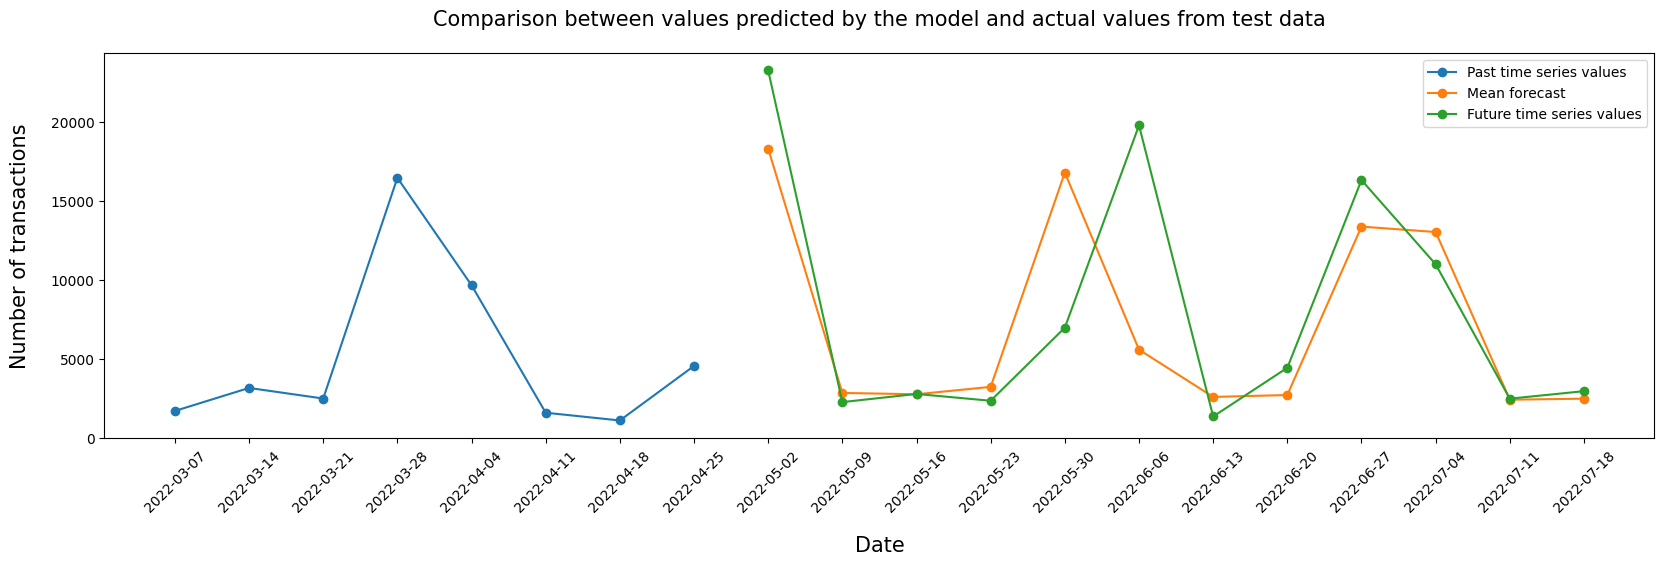

In [27]:
plt.figure(figsize=(20, 5))
plt.title("Comparison between values predicted by the model and actual values from test data", pad=20, fontsize=15)

item_id = "GB02"
y_past = train_data.loc[item_id]["target"]
y_pred = predictions.loc[item_id]
y_test = test_data.loc[item_id]["target"][:12]

# Get the dates for each observation
all_dates = list(y_past.index[-8:]) + list(y_test.index)
all_ticks = range(len(all_dates))

# Set the x-axis range for past and future
past_ticks = range(8)
future_ticks = range(8, len(all_dates))

plt.plot(past_ticks, y_past[-8:], label="Past time series values", marker='o', linestyle='-')
plt.plot(future_ticks, y_pred["mean"], label="Mean forecast", marker='o', linestyle='-')
plt.plot(future_ticks, y_test, label="Future time series values", marker='o', linestyle='-')



# Set x-axis labels with dates without time
date_labels = [date.strftime("%Y-%m-%d") for date in all_dates]
plt.xticks(all_ticks, date_labels, rotation=45)

# Add label for x-axis and y-axis
plt.xlabel("Date", fontsize=15, labelpad=15)
plt.ylabel("Number of transactions", fontsize=15, labelpad=15)

plt.legend()
plt.show()